In [1]:
using Revise
using GMT
using LaTeXStrings

In [2]:
includet("../GameAnalysis.jl")
includet("../SimplexPlots.jl")

In [27]:
players = 100
actions = 3
functions = 200
points_per_dim = 89
asg = to_sym_game(additive_sin_game(players, actions, functions, sin_params=Dict(:period_range=>[0,100],:amplitude_range=>[0,1000])), GPUArrays)
gmg = gaussian_mixture_game(players, actions, functions)
g = add_games(gmg, asg, g2_weight=asg.scale/gmg.scale)
mg = mixture_grid(3,points_per_dim)
r = regret(g,mg);


kpathsea: Running mktextfm phvr8t
/usr/share/texlive/texmf-dist/web2c/mktexnam: Could not map source abbreviation  for phvr8t.
/usr/share/texlive/texmf-dist/web2c/mktexnam: Need to update ?
mktextfm: Running mf-nowin -progname=mf \mode:=ljfour; mag:=1; nonstopmode; input phvr8t
This is METAFONT, Version 2.7182818 (TeX Live 2019/Debian) (preloaded base=mf)

kpathsea: Running mktexmf phvr8t

! I can't find file `phvr8t'.
<*> ...:=ljfour; mag:=1; nonstopmode; input phvr8t
                                                  
Please type another input file name
! Emergency stop.
<*> ...:=ljfour; mag:=1; nonstopmode; input phvr8t
                                                  
Transcript written on mfput.log.
grep: phvr8t.log: No such file or directory
mktextfm: `mf-nowin -progname=mf \mode:=ljfour; mag:=1; nonstopmode; input phvr8t' failed to make phvr8t.tfm.
kpathsea: Appending font creation commands to missfont.log.

kpathsea: Running mktextfm phvr8t
/usr/share/texlive/texmf-dist/web2c/

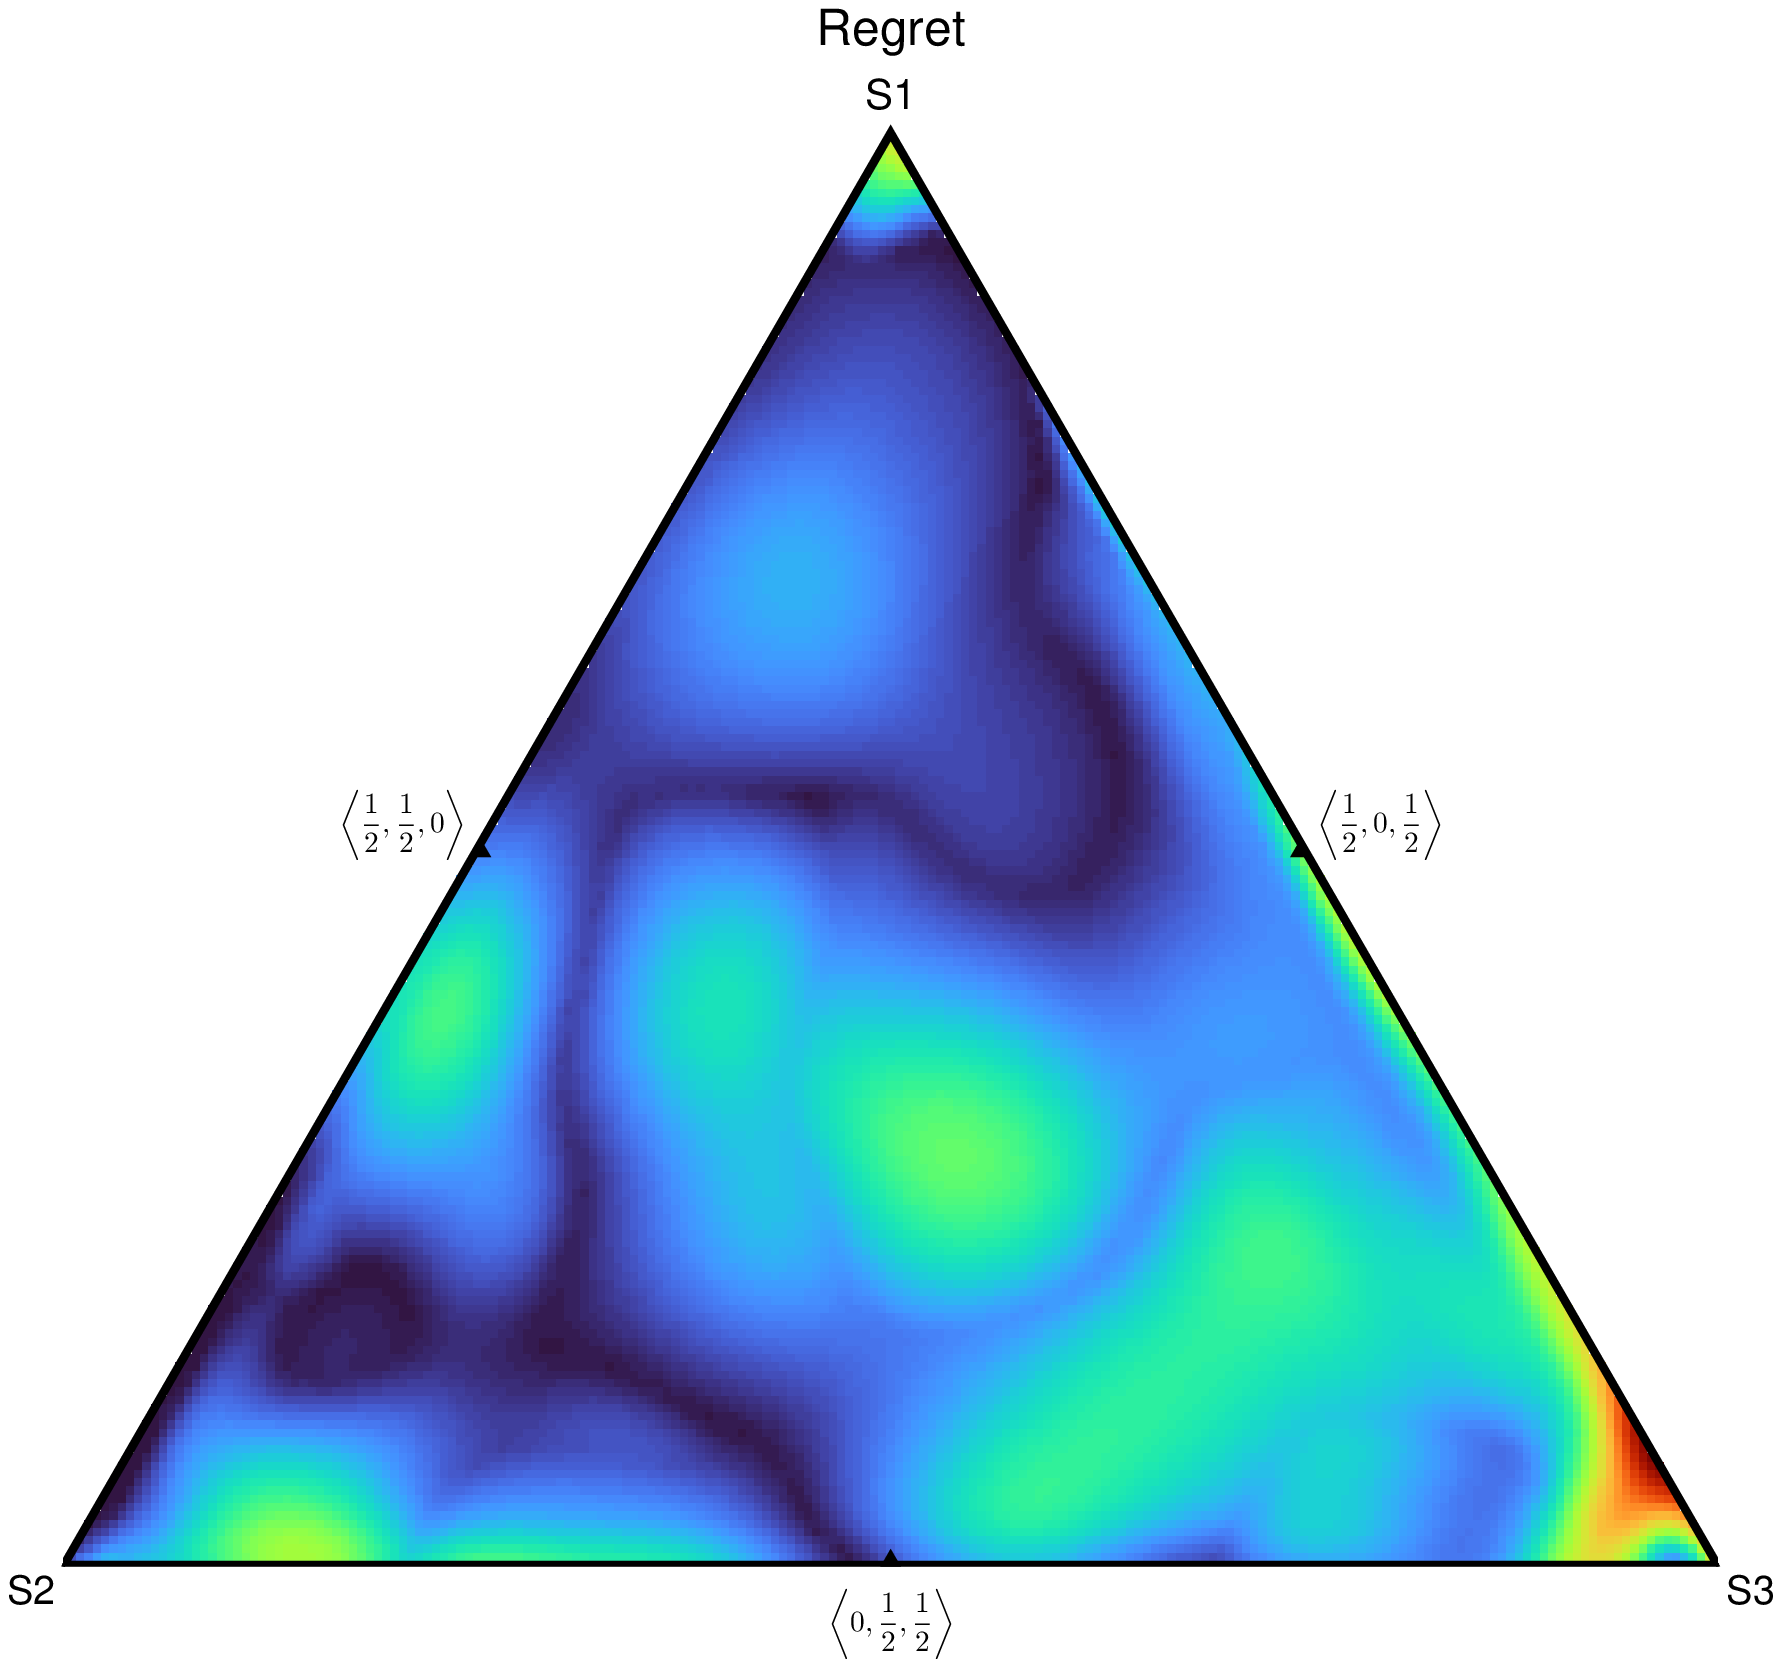

In [28]:
simplex_heatmap(mg, r; title="Regret", show=true)
# plot!(tern2cart(Array(mg')), marker=:p, markersize=.02, noclip=true, show=true)


kpathsea: Running mktextfm phvr8t
/usr/share/texlive/texmf-dist/web2c/mktexnam: Could not map source abbreviation  for phvr8t.
/usr/share/texlive/texmf-dist/web2c/mktexnam: Need to update ?
mktextfm: Running mf-nowin -progname=mf \mode:=ljfour; mag:=1; nonstopmode; input phvr8t
This is METAFONT, Version 2.7182818 (TeX Live 2019/Debian) (preloaded base=mf)

kpathsea: Running mktexmf phvr8t

! I can't find file `phvr8t'.
<*> ...:=ljfour; mag:=1; nonstopmode; input phvr8t
                                                  
Please type another input file name
! Emergency stop.
<*> ...:=ljfour; mag:=1; nonstopmode; input phvr8t
                                                  
Transcript written on mfput.log.
grep: phvr8t.log: No such file or directory
mktextfm: `mf-nowin -progname=mf \mode:=ljfour; mag:=1; nonstopmode; input phvr8t' failed to make phvr8t.tfm.
kpathsea: Appending font creation commands to missfont.log.

kpathsea: Running mktextfm phvr8t
/usr/share/texlive/texmf-dist/web2c/

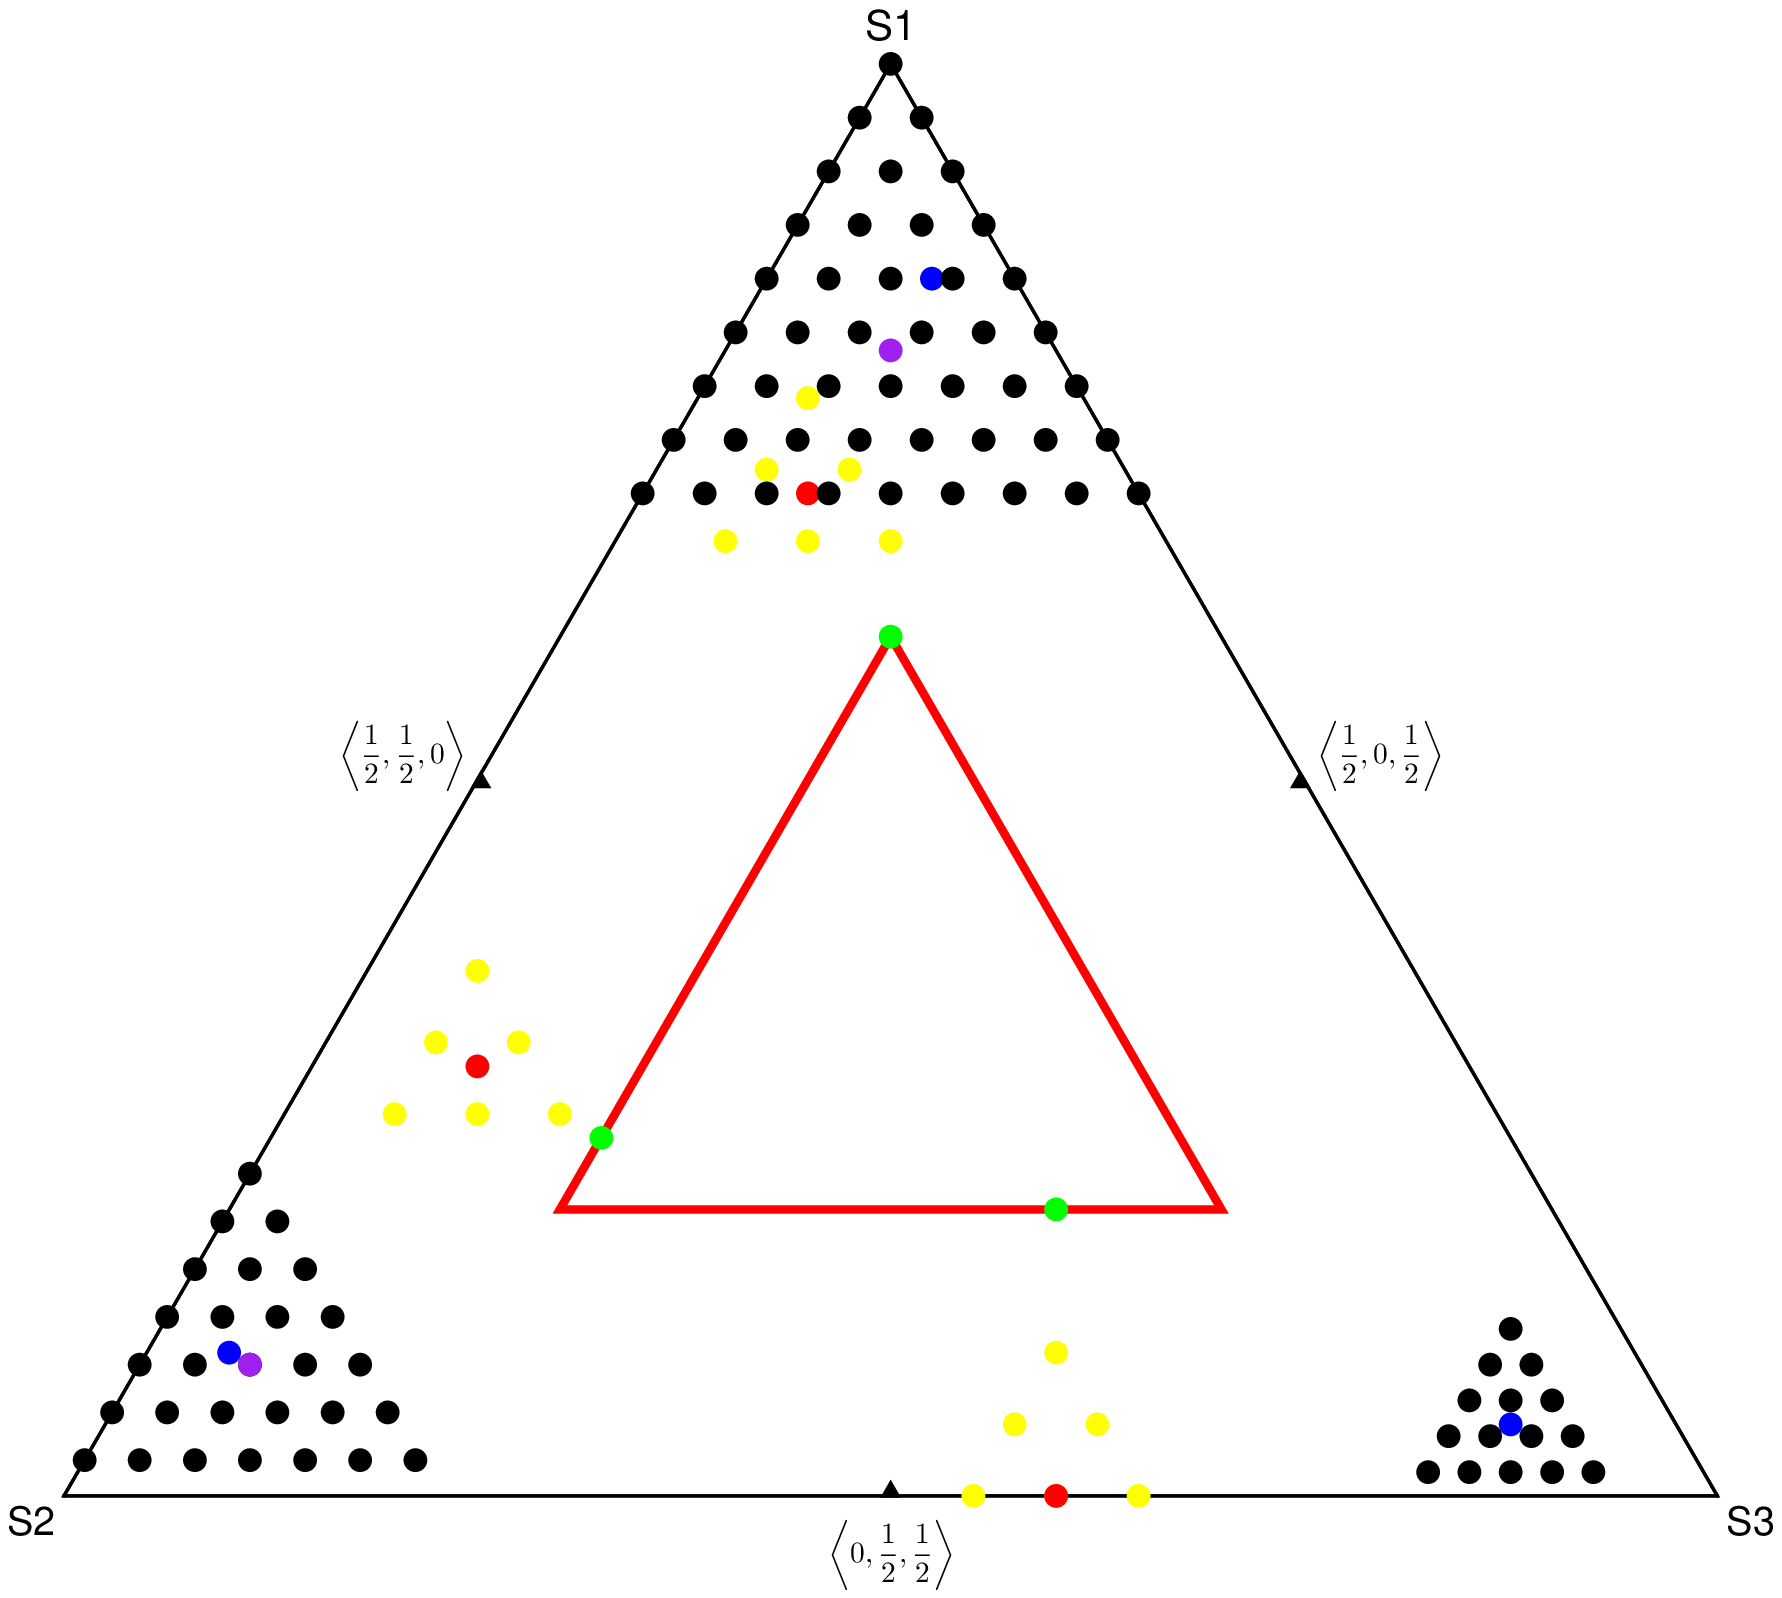

In [8]:
subsimplex = [.2 .2 .6; .2 .6 .2; .6 .2 .2; .2 .2 .6]
to_project = [0 .4 .6; .7 .2 .1; .3 .6 .1]'
projected = simplex_project(to_project, .4)
to_surround = [0.05 0.1 0.85; 0.1 0.85 0.05; 0.85 0.05 0.1]'

simplex_path(subsimplex; width=2, color=:red, frame=nothing)
simplex_scatter!(grid_around(to_project, .1, 3), marker=:p, markersize=.2, markerfacecolor=:yellow)
simplex_scatter!(to_project', marker=:p, markersize=.2, markerfacecolor=:red)
simplex_scatter!(projected', marker=:p, markersize=.2, markerfacecolor=:green)
simplex_scatter!(to_surround', marker=:p, markersize=.2, markerfacecolor=:blue)
simplex_scatter!(grid_around(to_surround[:,1], .1, 5), marker=:p, markersize=.2, noclip=true)
simplex_scatter!(grid_around(to_surround[:,2], .2, 7), marker=:p, markersize=.2, noclip=true)
simplex_scatter!(grid_around(to_surround[:,3], .3, 9), marker=:p, markersize=.2, noclip=true)
simplex_scatter!(simplex_project(to_surround[:,2], 0.8), marker=:p, markersize=.2, markerfacecolor=:purple)
simplex_scatter!(simplex_project(to_surround[:,3], 0.7), marker=:p, markersize=.2, markerfacecolor=:purple, show=true)


kpathsea: Running mktextfm phvr8t
/usr/share/texlive/texmf-dist/web2c/mktexnam: Could not map source abbreviation  for phvr8t.
/usr/share/texlive/texmf-dist/web2c/mktexnam: Need to update ?
mktextfm: Running mf-nowin -progname=mf \mode:=ljfour; mag:=1; nonstopmode; input phvr8t
This is METAFONT, Version 2.7182818 (TeX Live 2019/Debian) (preloaded base=mf)

kpathsea: Running mktexmf phvr8t

! I can't find file `phvr8t'.
<*> ...:=ljfour; mag:=1; nonstopmode; input phvr8t
                                                  
Please type another input file name
! Emergency stop.
<*> ...:=ljfour; mag:=1; nonstopmode; input phvr8t
                                                  
Transcript written on mfput.log.
grep: phvr8t.log: No such file or directory
mktextfm: `mf-nowin -progname=mf \mode:=ljfour; mag:=1; nonstopmode; input phvr8t' failed to make phvr8t.tfm.
kpathsea: Appending font creation commands to missfont.log.

kpathsea: Running mktextfm phvr8t
/usr/share/texlive/texmf-dist/web2c/

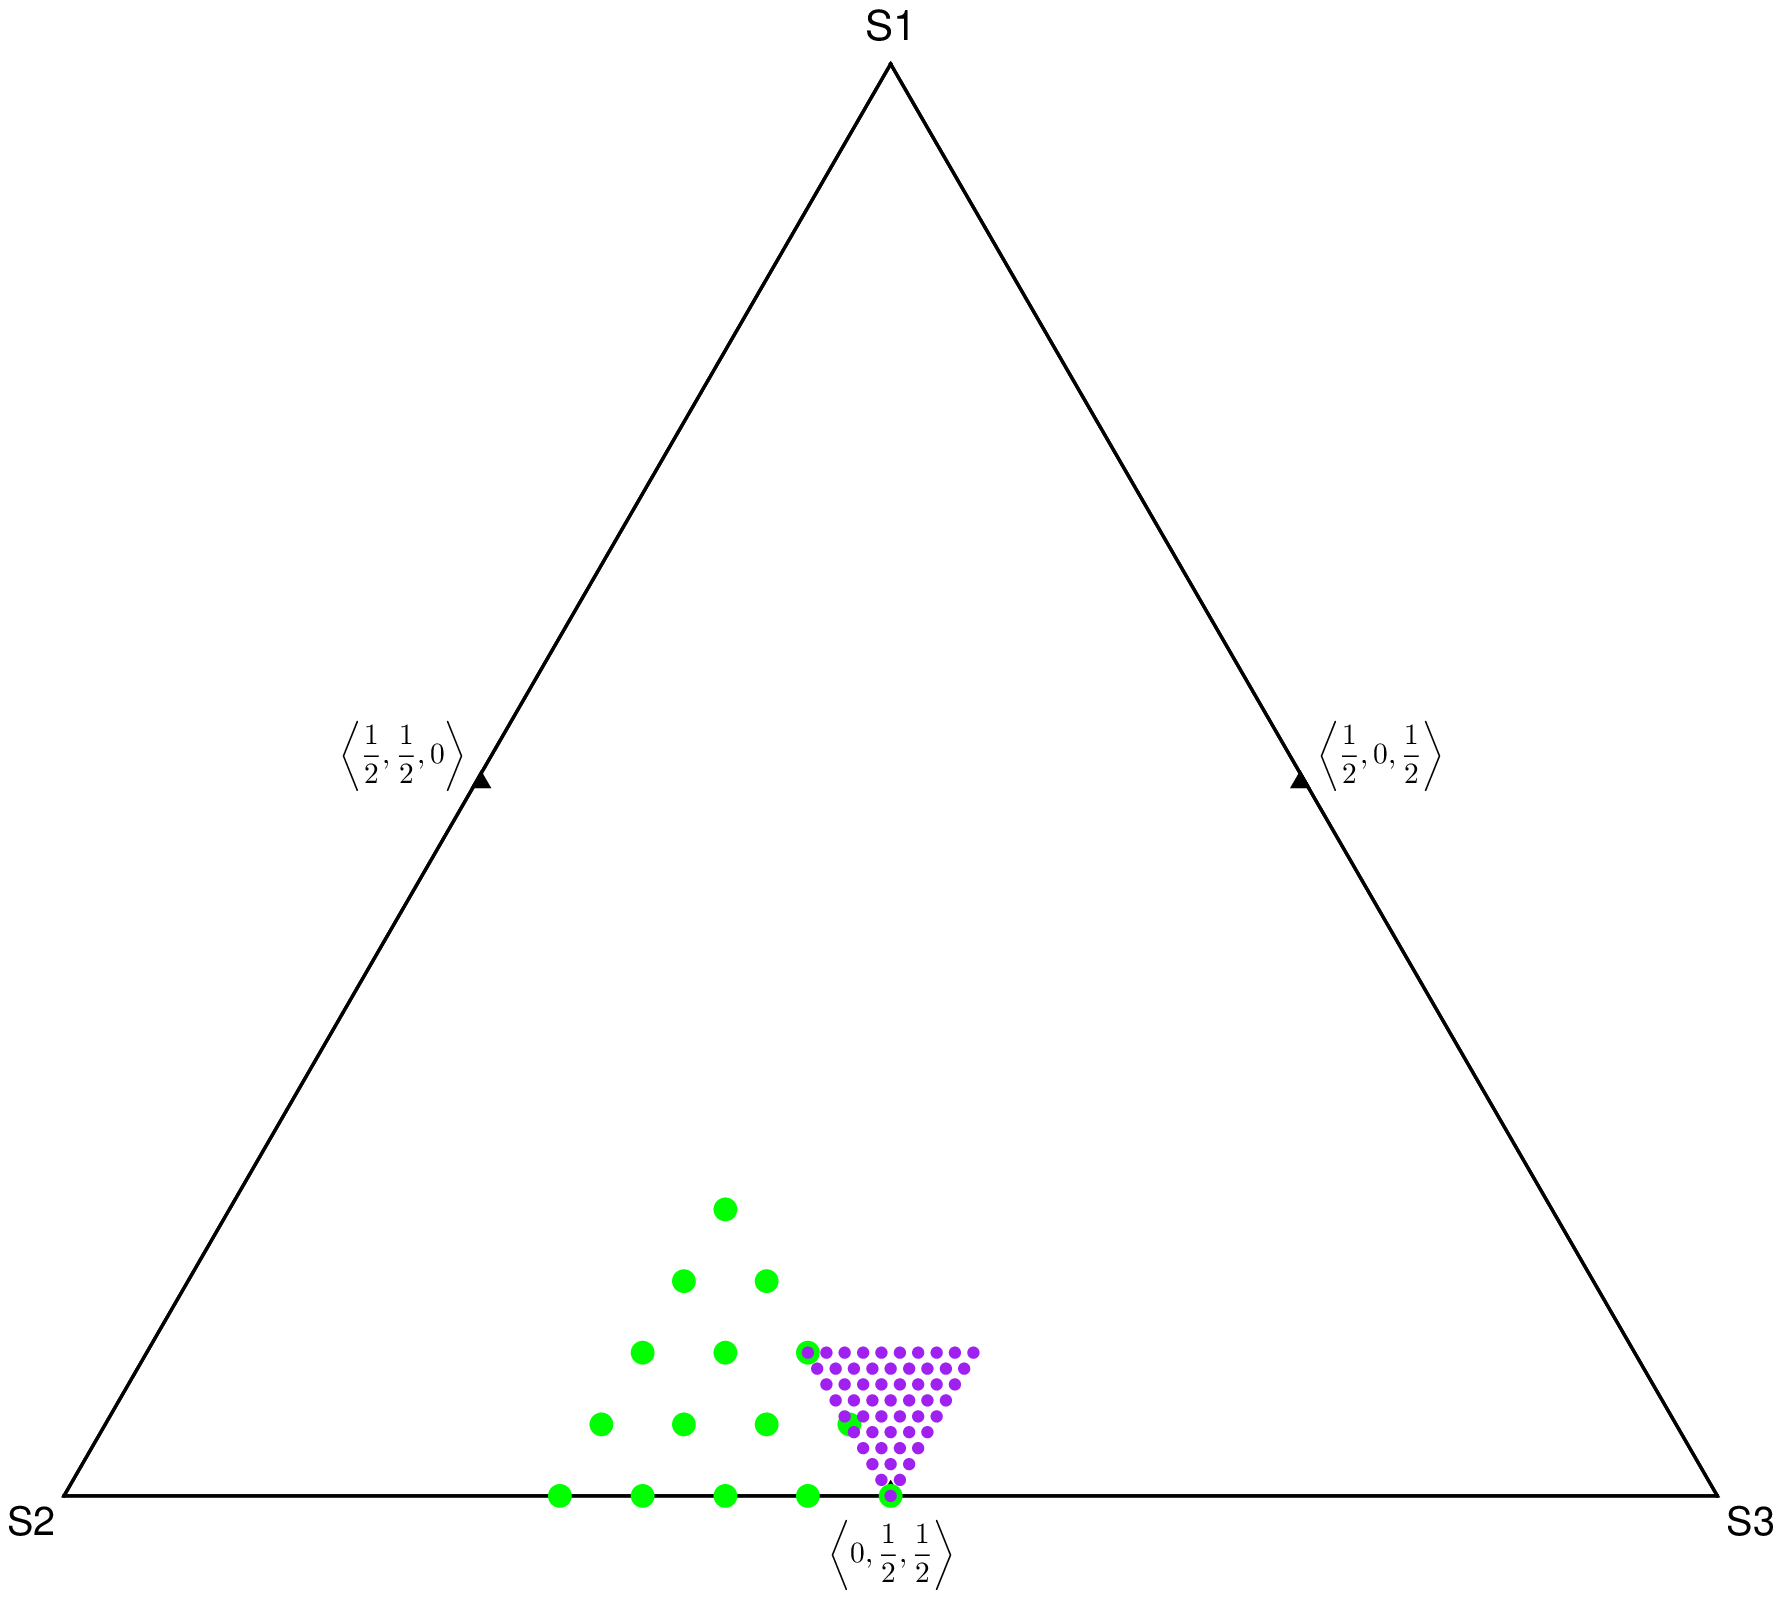

In [10]:
corners = [0 .7 .3; .2 .5 .3; 0 .5 .5]'
simplex_scatter(mixture_grid(corners, 5), markerfacecolor=:green, markersize=.2)
corners = [.1 .4 .5; .1 .5 .4; 0 .5 .5]'
simplex_scatter!(mixture_grid(corners, 10), markersize=.1, markerfacecolor=:purple, show=true)